In [1]:
import numpy as np # linear algebra
import pandas as pd # data manipulation and analysis
import matplotlib.pyplot as plt 
import seaborn as sns # data visualizationsns.set_style('whitegrid') # set style for visualization
import warnings 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from tools import *
warnings.filterwarnings('ignore')
pd.set_option('display.max_column',111)

warnings.filterwarnings('ignore')

In [2]:
df =pd.read_excel("insurance_compagies_4.xlsx")

Service_liste=['Claim Settlement Time','Claim Approval Rate','Claims Handling Process']
df=df[Service_liste]
df.head()

,Claim Settlement Time,Claim Approval Rate,Claims Handling Process
0,19.32,98.45,Inefficient
1,14.22,86.24,Efficient
2,29.53,94.47,Inefficient
3,23.75,97.16,Moderate
4,21.25,93.39,Moderate


In [3]:
Claims_Handling_Process_mapping = {'Inefficient': 0,
                'Moderate': 1,           
                'Efficient': 2,
                }

df['Claims Handling Process']=df['Claims Handling Process'].map(Claims_Handling_Process_mapping)

*******************
VIF Score lower than  18
   VIF Factor                 features
0    4.365599    Claim Settlement Time
1    5.764078      Claim Approval Rate
2    2.467572  Claims Handling Process
*******************
VIF Score higher than  18
Empty DataFrame
Columns: [VIF Factor, features]
Index: []


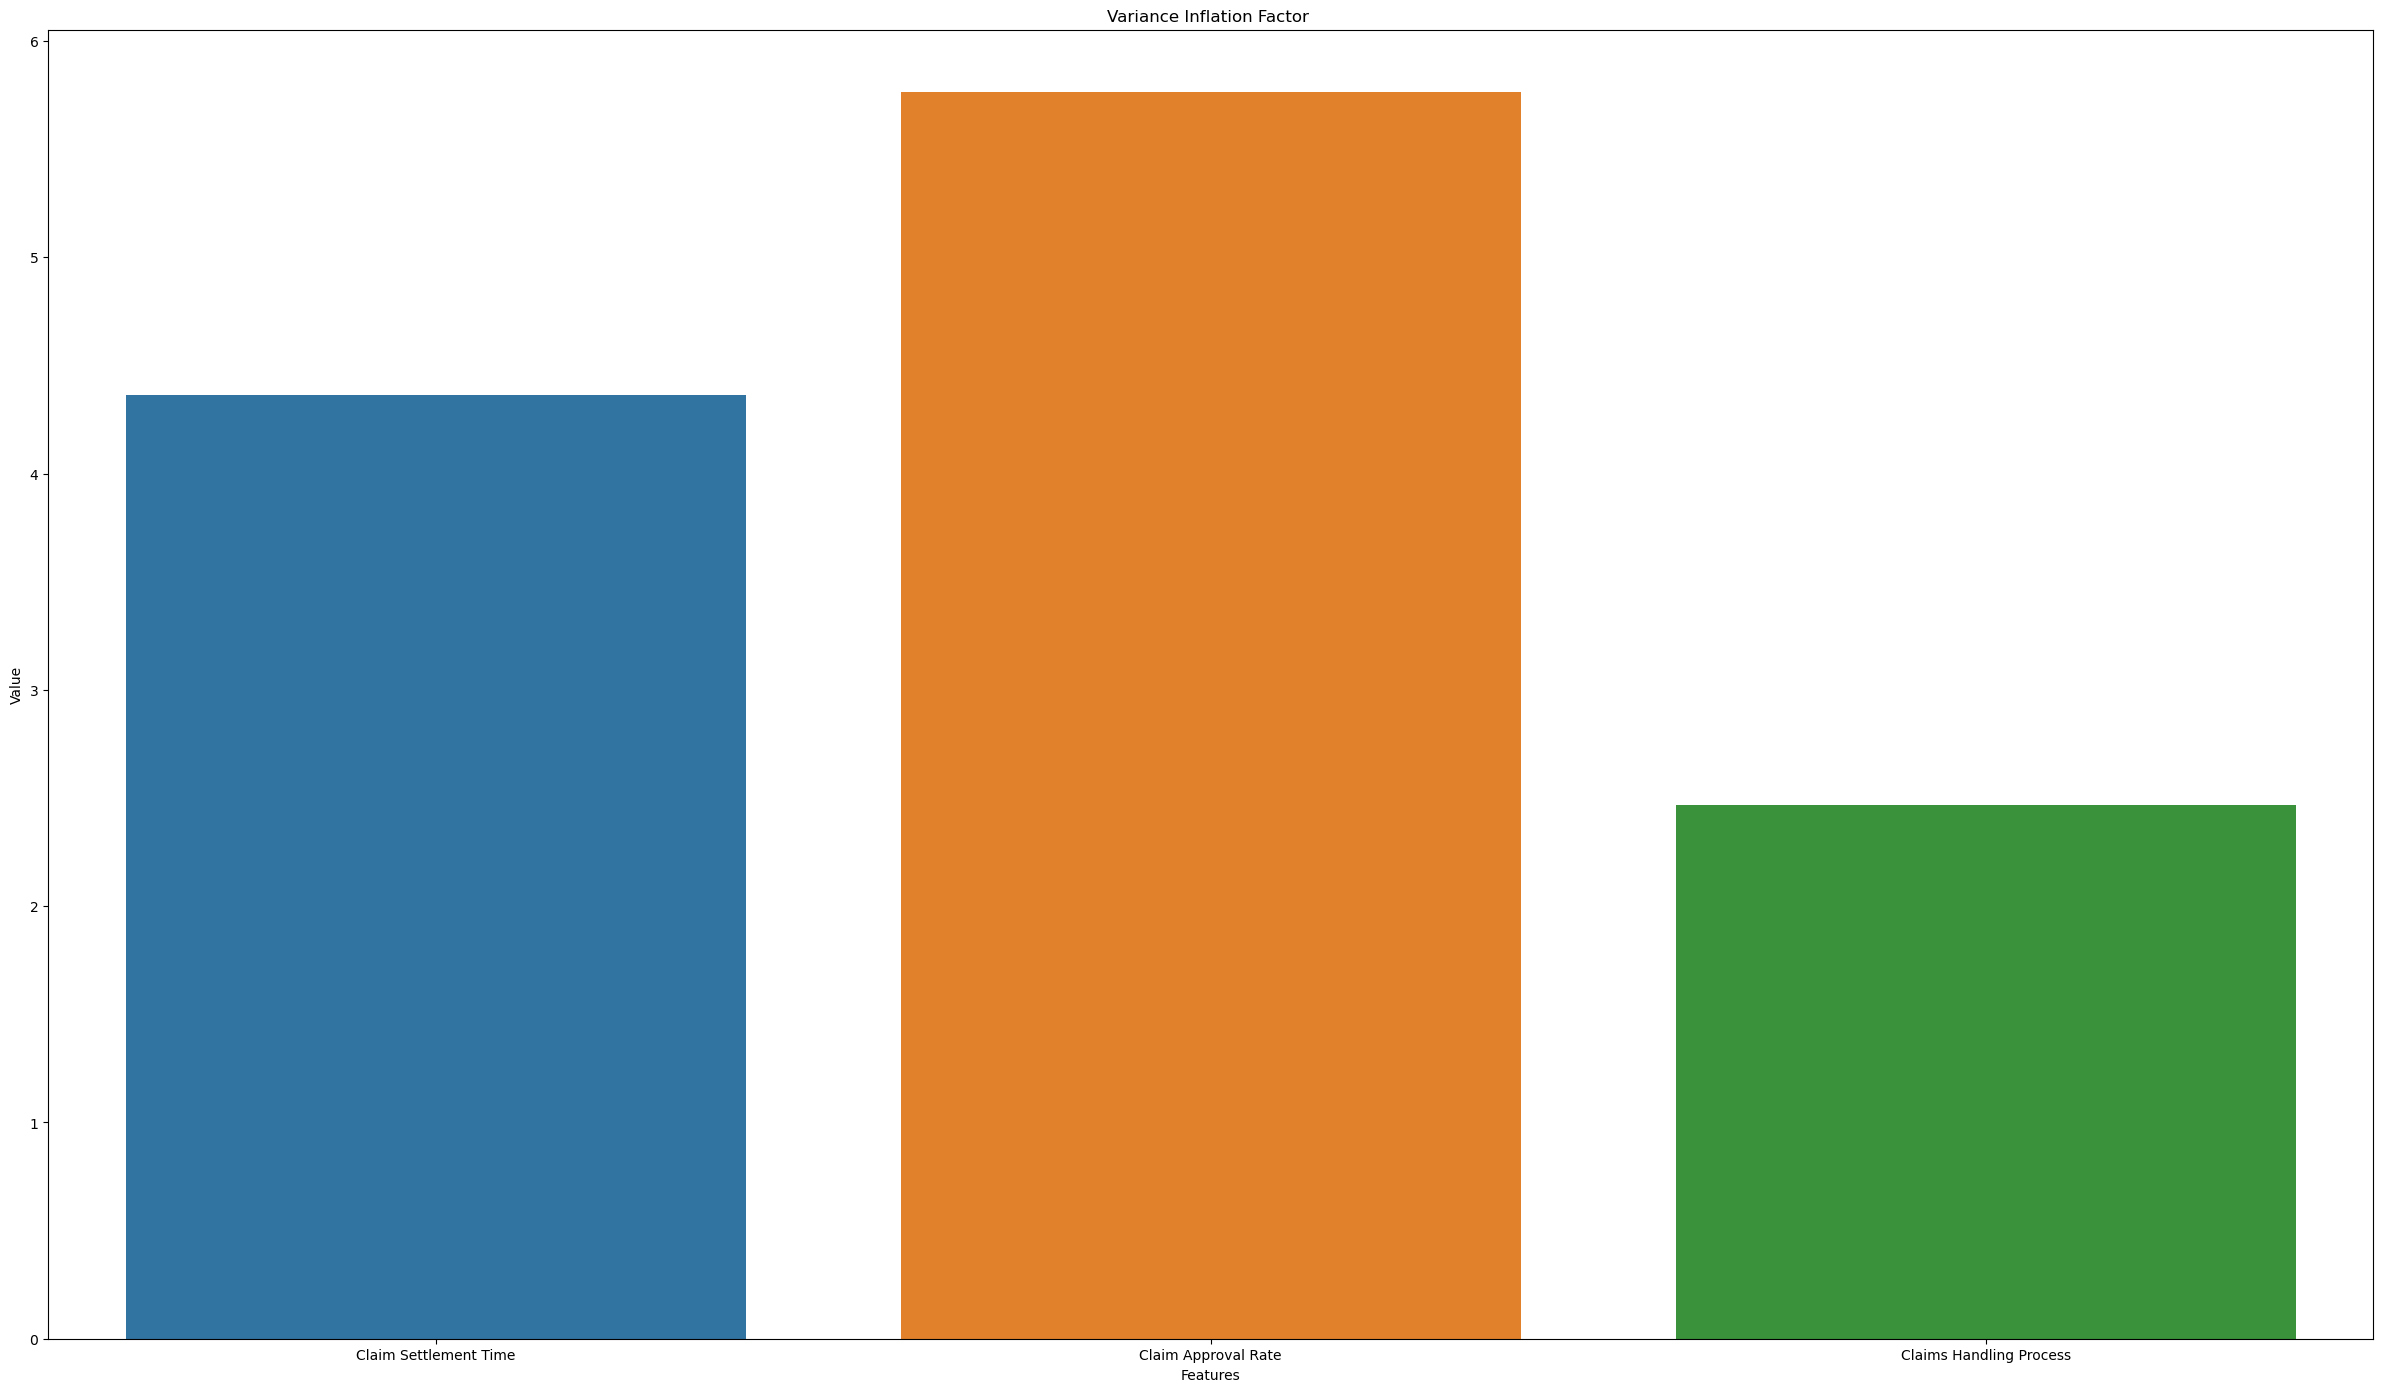

In [4]:
df1=VIF_features_selection(df,18)

In [5]:
scaler = StandardScaler()
scaled_data =scaler.fit_transform(df1)

## "Clustering Criteria for Insurance Agencies"


"Clustering Criteria for Insurance Agencies" outlines a set of parameters designed to group insurance agencies based on key performance indicators. These criteria aim to facilitate the development of a recommendation system by categorizing agencies .



## Feature : Service

#### Low Claim Settlement Time:

   *  We Prefer clusters where the time taken to settle insurance claims is low , ensuring prompt and efficient service .
   
#### High Claim Handling Process: 

   * We Prefer clusters where we have a high claims handling process, ensuring smooth and error-free processing of insurance claims.
   
#### Moderate Claim Approval Rate: 

   * While prioritizing efficiency, we also aim to maintain a balanced approach towards claim approvals, ensuring fair assessment and approval of valid claims while minimizing fraudulent or invalid claims.
    

updated
Cluster : 2  in process....
Cluster : 3  in process....
Cluster : 4  in process....
Cluster : 5  in process....
Cluster : 6  in process....
Cluster : 7  in process....
Cluster : 8  in process....
Cluster : 9  in process....


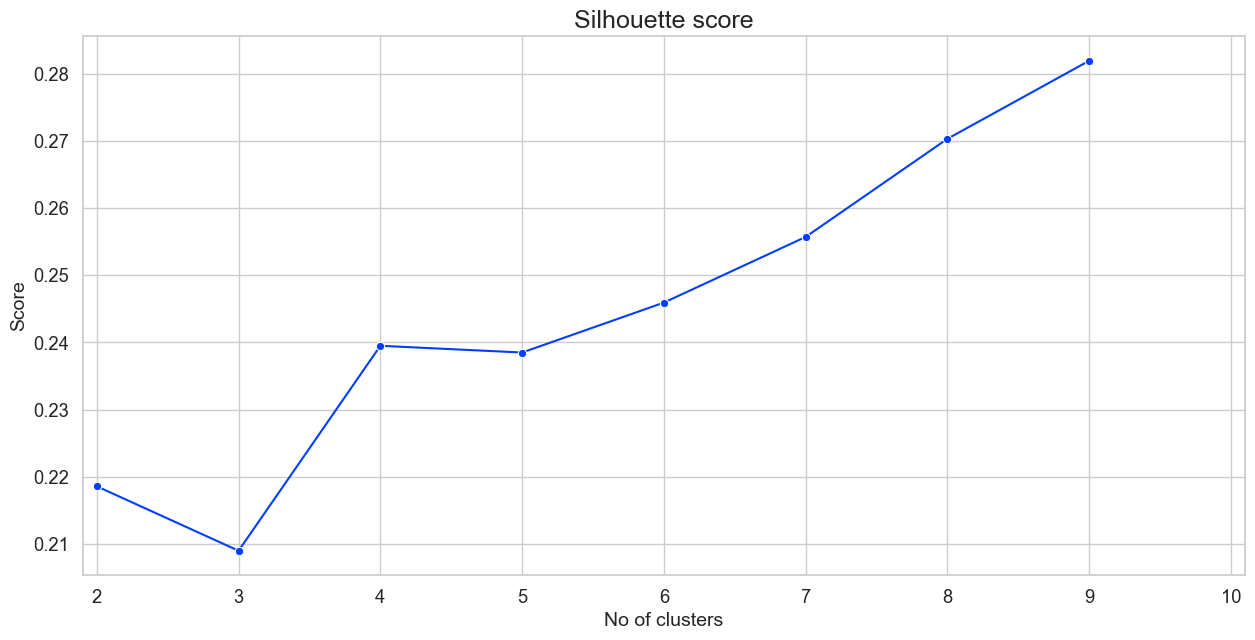

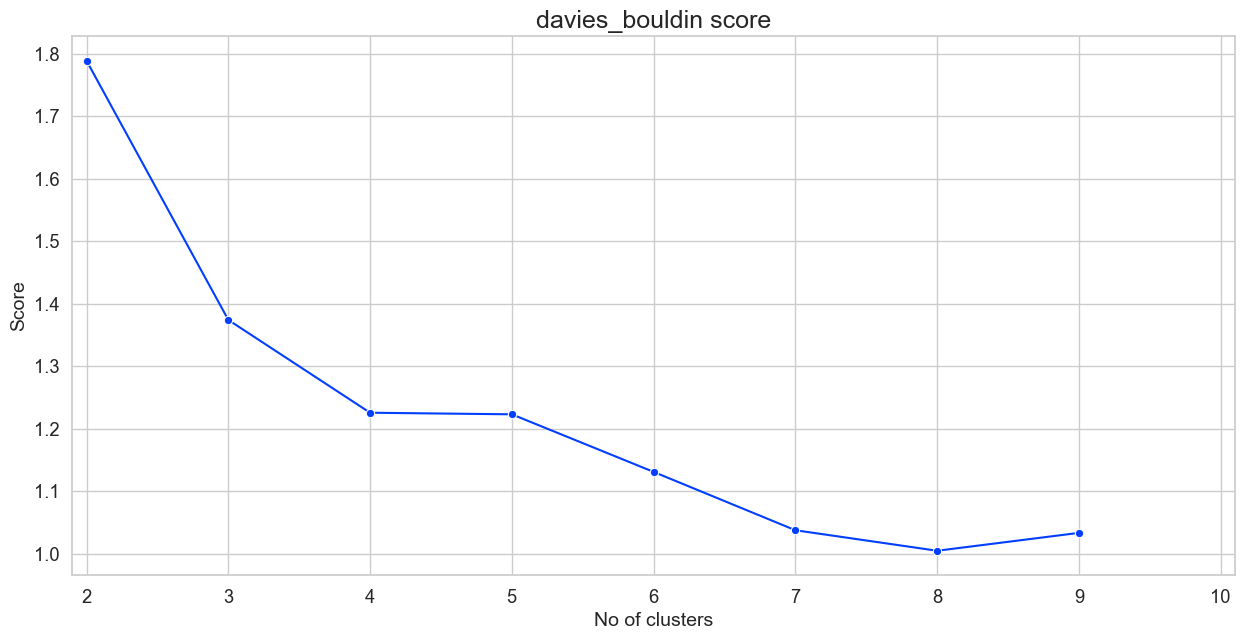

In [6]:
model =AgglomerativeClustering(linkage='ward',compute_full_tree=True)
ideal_model=Hiearchical_clustering(model,10,scaled_data)

In [ ]:
model =AgglomerativeClustering(linkage='ward',compute_full_tree=True)
model.set_params(n_clusters=4)

clusters=model.fit_predict(scaled_data)
# Add the cluster number to the original scaled data
X_clustered = pd.DataFrame(scaled_data, index=df1.index, columns=df1.columns)
X_clustered["cluster"] = clusters
means =  X_clustered.groupby(by="cluster").mean()
best_centroids=means.reset_index().drop(['cluster'],axis=1)

In [ ]:
Visualization_results(scaled_data,df1,best_centroids,clusters,pca_v=False)

## Observations from the boxplot chart:

  * Cluster 0 has the highest mean Claim Approval Rate, followed by Cluster 1, Cluster 2, and Cluster 3, which has the lowest mean.
   * Cluster 1 exhibits the highest variance in Claim Approval Rate among all clusters.
   * Cluster 2 has the highest mean Claim Settlement Time, followed by Cluster 0, Cluster 3, and Cluster 1, which has the lowest mean.
   * Cluster 0 exhibits the highest variance in Claim Settlement Time among all clusters.
   * Clusters 0, 1, and 3 have high mean Claims Handling Process, while Clusters 1 and 2 have low mean.

## Observations from the coordination plot:

   * the coordination parallel plot reflects a similar pattern to the boxplot, it indicates that the clusters maintain their relative positions and differences across the features consistently. This alignment between the two visualizations reinforces the robustness and coherence of the clustering results, indicating clear distinctions between the clusters in terms of service quality attributes.


In [7]:
scaler = StandardScaler()
scaled_data =scaler.fit_transform(df1)

Cluster : 2  In process....
Cluster : 3  In process....
Cluster : 4  In process....
Cluster : 5  In process....
Cluster : 6  In process....


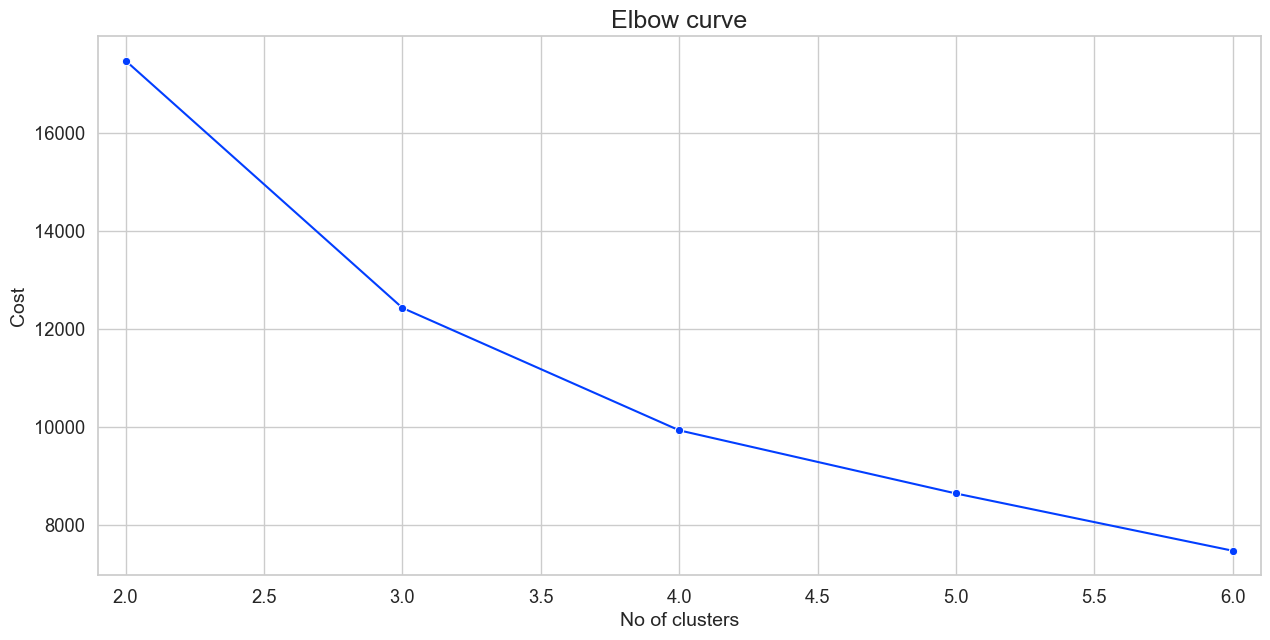

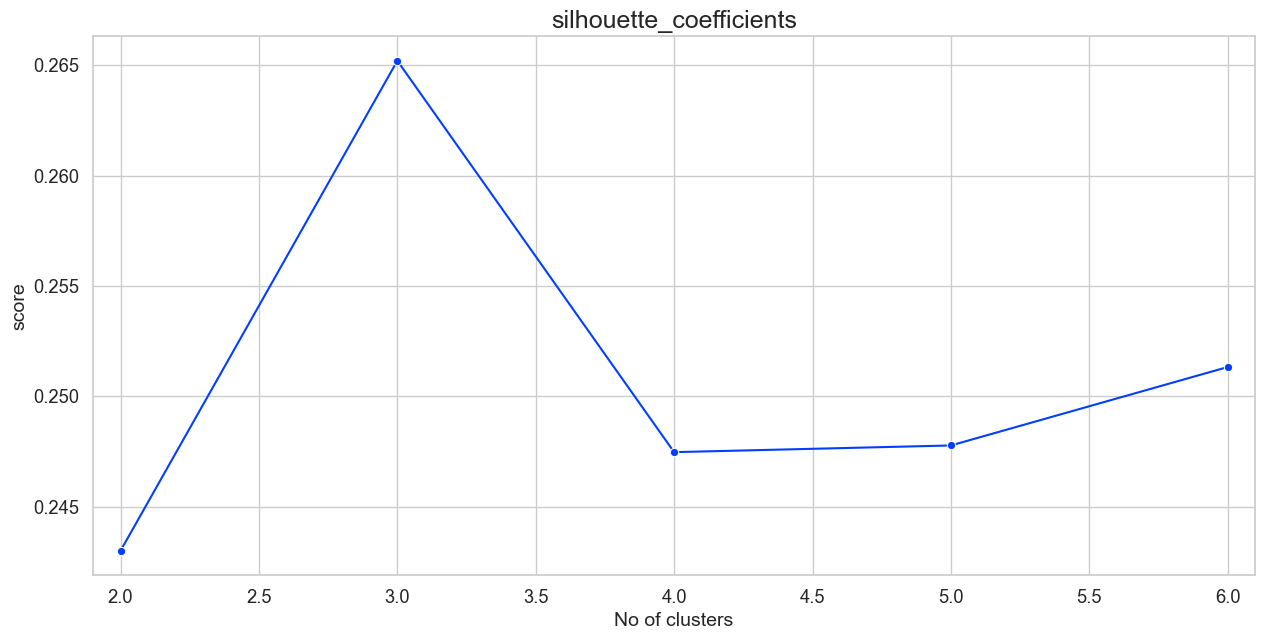

In [8]:
KPrototypes_clustering(2,6,scaled_data,[1])

In [7]:
test_model = KPrototypes(n_clusters=3, init='Huang', random_state=42,verbose=1)
clusters=test_model.fit_predict(scaled_data, categorical=[1])
best_centroids=test_model.cluster_centroids_

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 903, ncost: 12940.8699388477
Run: 1, iteration: 2/100, moves: 391, ncost: 12884.651349284957
Run: 1, iteration: 3/100, moves: 285, ncost: 12782.50486411231
Run: 1, iteration: 4/100, moves: 434, ncost: 12556.172908096976
Run: 1, iteration: 5/100, moves: 130, ncost: 12545.384697053547
Run: 1, iteration: 6/100, moves: 32, ncost: 12544.931217608282
Run: 1, iteration: 7/100, moves: 9, ncost: 12544.8932657495
Run: 1, iteration: 8/100, moves: 3, ncost: 12544.888969731936
Run: 1, iteration: 9/100, moves: 0, ncost: 12544.888969731936
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 1117, ncost: 12608.726965963411
Run: 2, iteration: 2/100, moves: 653, ncost: 12432.255798369339
Run: 2, iteration: 3/100, moves: 107, ncost: 12427.281859554003
Run: 2, iteration: 4/100, moves: 8, ncost: 12427.252958018344
Run: 2, iteration: 5/

                    ****************************                      
            Visualization of Boxplot               


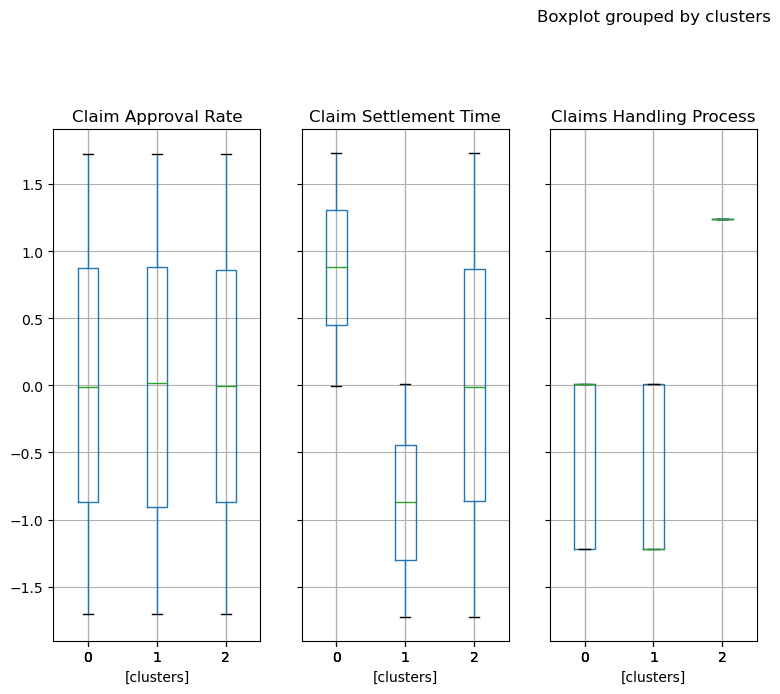

                    ****************************                      
            Visualization of Violin               


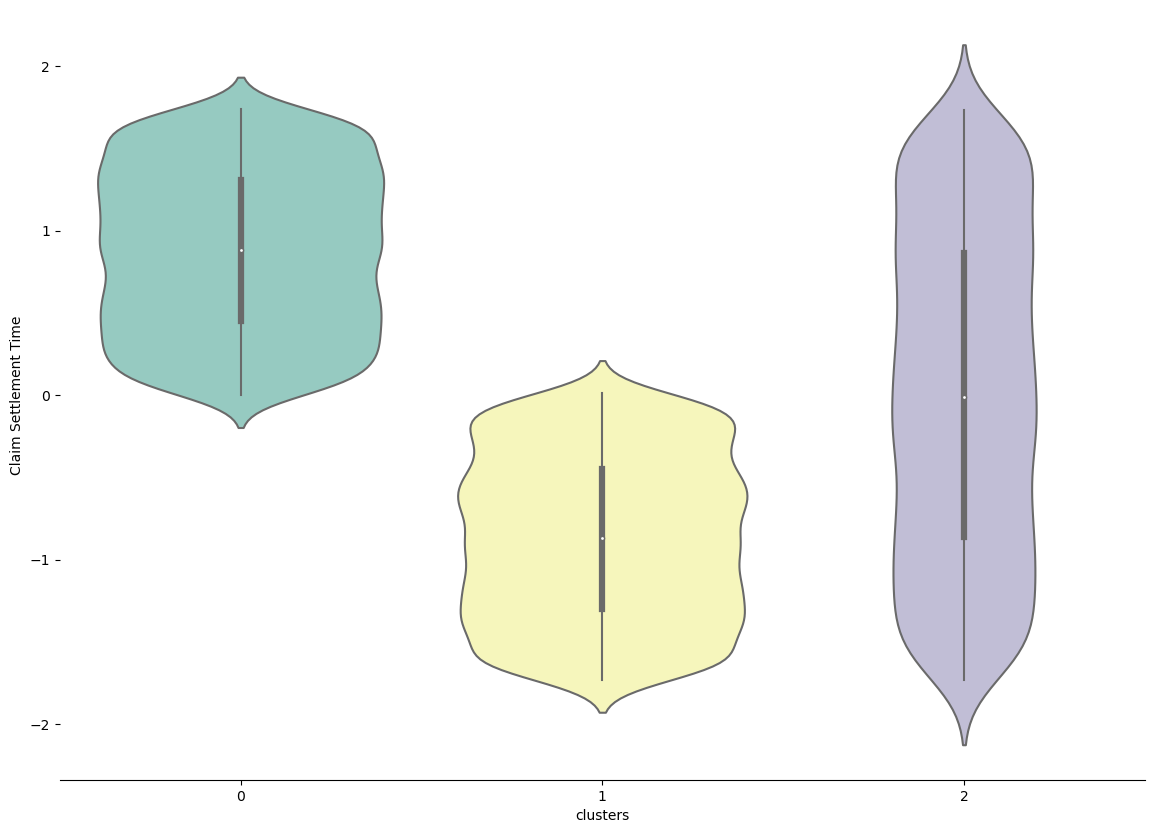

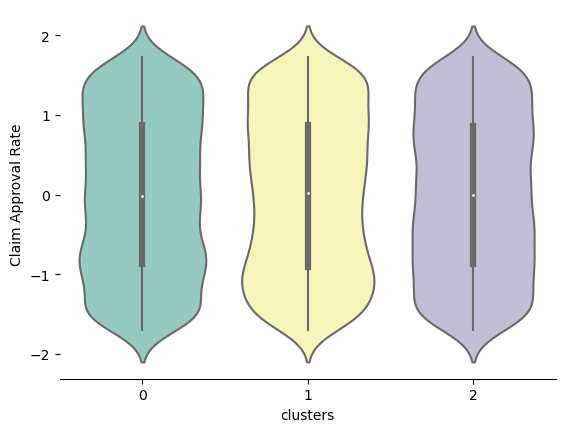

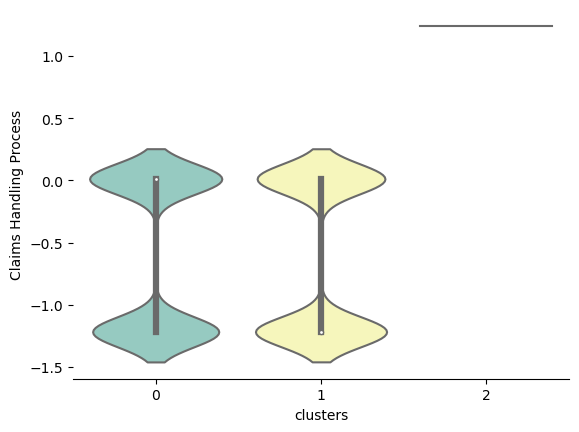

            Visualization of Coordination Chart               


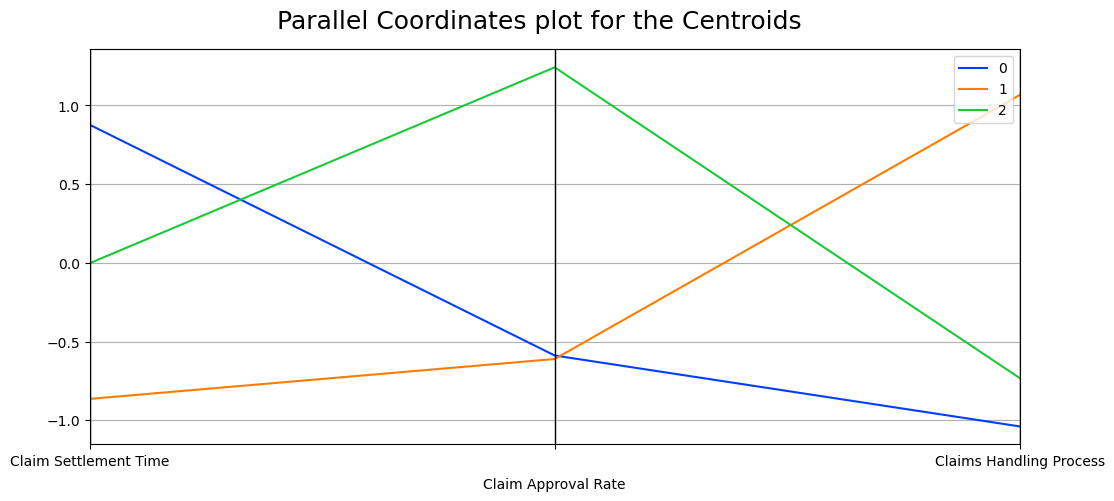

In [8]:
Visualization_results(scaled_data,df1,best_centroids,clusters,pca_v=False)

## Observations from the boxplot chart:

   * Cluster 2 exhibits the highest mean in Claim Handling Process.
   * Clusters 0 and 1 show comparable results in Claim Handling Process.
   * Cluster 1 has the lowest mean in Claim Settlement Time.
   * Cluster 0 has the highest mean in Claim Settlement Time.
   * Cluster 2 shows the highest variability in Claim Settlement Time.

## Observations from the coordination plot:

   * Cluster 0 has the highest centroid for Claim Settlement Time, followed by Cluster 2, and then Cluster 1.
   * This aligns with the earlier observation from the boxplot analysis.
   * Cluster 2 has the highest centroid for Claim Approval Rate, followed by Clusters 0 and 1, which have comparable centroids.
   * Cluster 2 has the lowest centroid for Claims Handling Process, followed by Cluster 0, and then Cluster 1, which has the highest centroid.

## Comparative Analysis of Clustering Methods

   * After carefully evaluating the results of both clustering models, we have decided to proceed with the first model. Although the decision was challenging due to the comparable performance of both models, the first model stood out for several reasons. Firstly, it demonstrated a moderate silhouette score, indicating a good cluster separation and cohesion. Additionally, upon closer examination, we found that the clusters generated by the first model aligned more closely with our business requirements. The clusters identified by the first model exhibited distinct characteristics that were well-suited for our recommendation and classification tasks. Moreover, the first model provided more clarity and interpretability in terms of cluster characteristics, making it easier to derive actionable insights. Therefore, based on these considerations, we concluded that the first model would be the preferred choice for our analysis"

In [9]:
df1['Service_score']=clusters

## Cluster Interpretation :

### Cluster 0 :

   * Claim Settlement Time: Cluster 0 settles claims  slowly compared to the other clusters. This could indicate inefficient processing, potentially leading to lower customer satisfaction.
   * Comparison with Cluster 1: Cluster 0 lags behind Cluster 1 in claim approval rate and claims handling process, suggesting areas where it could enhance its performance.

### Cluster 1 :

   * Claims Handling Process: Cluster 1 excels in managing claims efficiently, potentially leading to higher customer satisfaction.
   * Claim Settlement Time:  Cluster 1 takes the lowest time to settle claims compared to Cluster 0 and 2, potentially leading to higher customer 
   * Comparison with Cluster 2: Cluster 1 falls behind Cluster 2 in claim approval rate, indicating areas for improvement.

### Cluster 2 :

   * Claim Approval Rate: Cluster 2 has the highest rate of approving claims, indicating efficient processing and potentially higher customer satisfaction.
   * Claims Handling Process: Cluster 2 handles claims least efficiently among the clusters, leading to worst experience.
   * Comparison with Clusters 0 and 1: While Cluster 2 performs better in claim approval rate , it's perform much worst on the other metrics which make it need a lot of improvements .


### Reordering  clusters 

In [10]:
Service_mapping={1:2,0:0,2:1}
df1['Service_score']=df1['Service_score'].map(Service_mapping)
df1.to_csv('features_engineerd/Service_Score.csv',index=False)